In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [5]:
def clean_data(df1):
    
    month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,
             'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    df1['Release Date'] = df1['Release Date'].str.split()
    
    months = []
    
    for i in df1['Release Date']:
        a = i[0]
        months.append(month_dict[a])
    df1['MoR'] = months
    df1['Gross'] = df1['Gross'].str.replace('[\$,]', '', regex=True).astype(int)
    
    return df1

In [6]:
def plot_data(df,year):
    
    
#     #df_sorted = df1.sort_values(by='MoR')
#     grouped = df1.groupby('MoR')['Gross'].sum()
#     grouped2 = df1.groupby('MoR')['Gross']
#     sums_dict = grouped.to_dict()
# #     plt.bar(sums_dict.keys(), sums_dict.values())
# #     plt.show()
    
#     grouped_data = [df1[df1['MoR'] == val]['Gross'] for val in df1['MoR'].unique()]

# #     # Plot box plots for each group
# #     plt.boxplot(grouped_data, labels=df_sorted['MoR'].unique())
    
# #     plt.show()
    dfs = df.sort_values(by='MoR')
    group = dfs.groupby('MoR')['Gross'].sum()
    group1 = group.to_dict()
    group2 = [dfs[dfs['MoR'] == month]['Gross'] for month in dfs['MoR'].unique()]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.bar(group1.keys(), group1.values())
    ax1.set_title('Bar Plot of total monthly Gross')
    ax1.set_xlabel('Months')
    ax1.set_ylabel('Gross Collection in USD')
    
    ax2.boxplot(group2,labels=dfs['MoR'].unique())
    ax2.set_title('Box Plot of monthly Gross')
    ax2.set_xlabel('Months')
    ax2.set_ylabel('Gross Collection in USD')
    
    ax3.hist(dfs['MoR'],bins=12,color='blue')
    ax3.set_title('Number of releases every month')
    ax3.set_xlabel('Months')
    ax3.set_ylabel('Frequency')
    
    # Set the main title for the entire figure
    plt.suptitle(f'Main Title: Bar Plot and Box Plot of GROSS BO for the year {year}', fontsize=16)

# Adjust layout
    plt.tight_layout()

# Display the plot
    plt.show()


In [7]:
def get_stats(df):

    count = (df['MoR'] == 12).sum()
    print("There were ", count, "releases in the month of december")
    
    dfs = df.sort_values(by='Gross',ascending=False)
    print(dfs[['Release','Gross','MoR','Theaters']].head(10))

In [8]:
def get_data(years):
    
    df_list = []
    
    for i in years:
        
        url = f"https://www.boxofficemojo.com/year/{i}/?grossesOption=calendarGrosses"
        
        table = pd.read_html(url)[0]
        
        df = clean_data(table)
        
        df_list.append(df)
     
    newdf = pd.concat(df_list,ignore_index = True)
    
    return newdf

In [3]:
years = [x for x in range(2000,2020,1)]
df = get_data(years)

NameError: name 'get_data' is not defined

In [2]:
df.head()

NameError: name 'df' is not defined

In [8]:
df.to_csv('data_20_years.csv', index=False)  # Save to CSV without index


In [9]:
def releases_per_month(df):
    
    # plot number of releases every month
    
    value_counts = df['MoR'].value_counts()

    # Extract unique values and their frequencies
    unique_values = value_counts.index
    frequencies = value_counts.values

    # Plot a bar plot
    plt.figure(figsize=(10, 6))
    desired_value = len(df)/12
    plt.axhline(y=desired_value, color='red', linestyle='--', label=f'Average: {desired_value}')
    bars = plt.bar(unique_values, frequencies, color='blue')

# Annotate the bars with their respective frequencies
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    
    #plt.bar(unique_values, frequencies, color='blue')
    plt.xlabel('Months')
    plt.ylabel('Frequency')
    plt.xticks(unique_values)
    plt.title('Frequency of movie releases every month')
    plt.legend()
    plt.show()
    

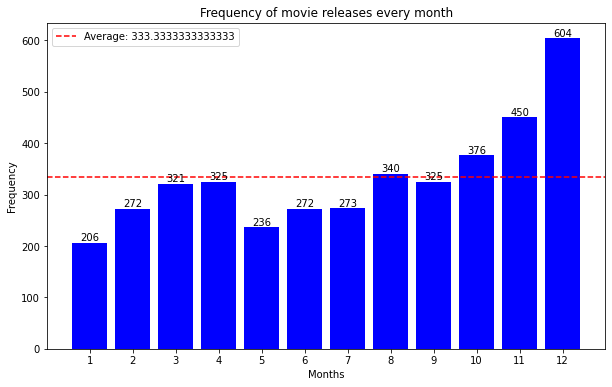

In [10]:
releases_per_month(df)

In [10]:
def gross_per_month(df):
    
    a = df.groupby('MoR')
    b = a['Gross'].sum()
    mydict = {}


    for i in range(len(b)):
    
        mydict[i+1] = b.iloc[i]
    
    indices = mydict.keys()
    values = mydict.values()
    
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(indices, values, color='blue')

# Annotate the bars with their respective frequencies
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval, f'{yval / 1e9:,.0f}', ha='center', va='bottom')
        
    
    plt.xlabel("Month")
    plt.ylabel("Gross in billions")
    #plt.xticks(indices)
    plt.title("Total Gross per Month across 20 years")
    plt.show()

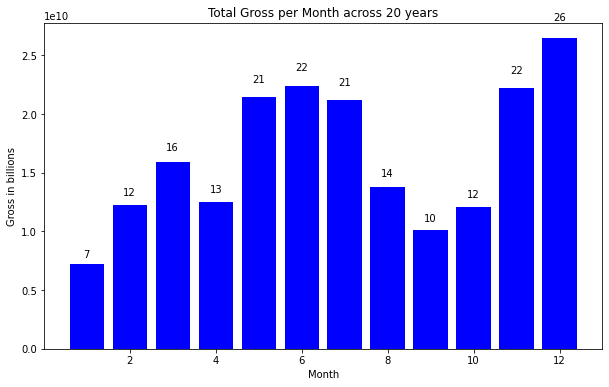

In [12]:
gross_per_month(df)

In [13]:
def get_yearly_stats(year):
    
    url = f"https://www.boxofficemojo.com/year/{year}/?grossesOption=calendarGrosses"
    table = pd.read_html(url)[0]
    df = clean_data(table)
    a = df.groupby('MoR')
    b = df[['MoR','Gross','Theaters']]
    result = a[['Gross','Theaters']].sum()
    print(result)
    
    plt.figure(figsize=(8,6))
    sb.set_style('dark')
    sb.scatterplot(x='Theaters',y='Gross',data = result)
    
    for i, row in result.iterrows():
        plt.annotate(i, (row['Theaters'], row['Gross']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xlabel("Number of Theaters")
    plt.ylabel("Gross monthly collection")
    plt.title(f"Gross vs Theater every month in {year}")
    plt.show()

          Gross  Theaters
MoR                      
1     342879696     22893
2    1101598544     28397
3     767932037     50683
4    1204107116     31516
5     802405618     27452
6    1487052770     38898
7    1040245586     34022
8     720825944     44254
9     574535026     39313
10    762785663     32010
11   1387335461     70849
12   1457617277     75948


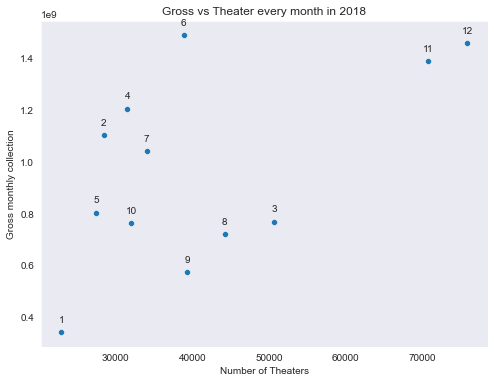

In [15]:
get_yearly_stats(2018)


In [103]:
df['Release'][900]

'Twisted'

In [123]:
def query(df):
    
    budgets = []
    
    for i in range(len(df)):
        
        movie = df['Release'][i].replace(' ', '+')
        
        url = f"https://www.google.com/search?q=what+is+the+budget+of+{movie}&oq=&gs_lcrp=EgZjaHJvbWUqCQgAECMYJxjqAjIJCAAQIxgnGOoCMgkIARAjGCcY6gIyCQgCECMYJxjqAjIJCAMQIxgnGOoCMgkIBBAjGCcY6gIyCQgFECMYJxjqAjIJCAYQIxgnGOoCMgkIBxAjGCcY6gLSAQkxNDI5ajBqMTWoAgiwAgE&sourceid=chrome&ie=UTF-8"
    
#   <div class="BNeawe iBp4i AP7Wnd">123 million USD</div>
        page = requests.get(url).content
        soup = BeautifulSoup(page,"html.parser")
        result = soup.find('div',class_="BNeawe iBp4i AP7Wnd") #this works
    #result = soup.find('div', class_="Z0LcW t2b5Cf")
    
    #result = soup.find('div', class_="BNeawe iBp4i AP7Wnd")
        if result!=None:
            print(100*i/len(df))
            budgets.append(result.text)
        else:
            budgets.append("-1")
            
    return budgets

In [124]:
budgets = query(df)

0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.25
0.3
0.325
0.35
0.425
0.45
0.475
0.5
0.525
0.55
0.575
0.6
0.625
0.65
0.675
0.725
0.875
0.925
0.95
1.025
1.05
1.075
1.1
1.125
1.15
1.175
1.2
1.25
1.275
1.3
1.325
1.375
1.4
1.425
1.45
1.5
1.525
1.55
1.575
1.6
1.675
1.875
1.925
1.95
1.975
2.0
2.025
2.1
2.2
2.225
2.275
2.325
2.35
2.4
2.475
2.5
2.525
2.6
2.75
2.775
2.85
2.9
3.025
3.075
3.175
3.2
3.375
3.475
3.5
3.55
3.6
3.625
3.65
3.675
3.75
3.775
3.875
3.975
4.0
4.15
4.175
4.2
4.325
4.35
4.4
4.425
4.475
4.6
4.7
4.825
4.925
5.0
5.025
5.05
5.075
5.1
5.15
5.175
5.225
5.25
5.275
5.3
5.375
5.425
5.475
5.575
5.6
5.625
5.675
5.7
5.775
5.85
5.875
5.9
5.95
6.1
6.15
6.2
6.275
6.3
6.325
6.375
6.425
6.525
6.6
6.625
6.65
6.7
6.725
6.75
6.775
6.8
6.85
6.9
6.925
7.0
7.025
7.075
7.175
7.2
7.25
7.3
7.325
7.35
7.5
7.55
7.575
7.6
7.625
7.675
7.7
7.75
7.95
7.975
8.025
8.05
8.075
8.1
8.125
8.2
8.225
8.4
8.5
8.55
8.575
8.675
8.75
8.825
8.85
8.875
8.9
8.925
8.975
9.0
9.025
9.05
9.15
9.175
9.5
9.525
9.6
9.675
9.7
9.725
9.82

58.075
58.15
58.175
58.325
58.35
58.425
58.475
58.5
58.6
58.625
58.65
58.675
58.75
58.775
58.8
58.85
58.875
58.9
58.95
58.975
59.05
59.1
59.125
59.15
59.175
59.25
59.275
59.3
59.4
59.475
59.55
59.625
59.675
59.75
59.8
59.825
60.0
60.025
60.05
60.075
60.1
60.125
60.15
60.175
60.225
60.25
60.3
60.325
60.35
60.375
60.4
60.475
60.5
60.55
60.575
60.6
60.675
60.7
60.775
60.8
60.825
60.85
60.875
60.9
60.925
60.95
61.0
61.025
61.05
61.1
61.125
61.175
61.2
61.225
61.275
61.325
61.35
61.375
61.4
61.45
61.475
61.525
61.55
61.575
61.625
61.65
61.675
61.75
61.775
61.8
61.85
61.9
62.0
62.025
62.1
62.15
62.175
62.2
62.225
62.25
62.275
62.3
62.35
62.4
62.45
62.475
62.525
62.55
62.6
62.65
62.675
62.7
62.725
62.85
62.9
62.975
63.025
63.05
63.075
63.1
63.15
63.2
63.325
63.4
63.425
63.575
63.675
63.7
63.75
63.775
63.85
63.925
64.0
64.025
64.05
64.125
64.275
64.325
64.35
64.375
64.4
64.425
64.5
64.525
64.55
64.625
64.725
64.75
64.8
64.825
64.875
64.975
65.0
65.05
65.075
65.1
65.125
65.15
65.2
65.225
65.325

In [126]:
df['Budgets'] = budgets

In [130]:
df.to_csv('data_20_years2.csv', index=False)

In [137]:
df['Budgets'] = df['Budgets'].str.extract('(\d+)')

In [141]:
df['Budgets'] = df['Budgets'].astype(int)

In [143]:
df['Gross'] = df['Gross']/1e6

In [144]:
df.head()

,Rank,Release,Genre,Budget,Running Time,Gross,Theaters,Total Gross,Release Date,Distributor,Estimated,MoR,Budgets
0,1,How the Grinch Stole Christmas,-,-,-,251.628705,3256,"$260,044,825","[Nov, 17]",Universal Pictures,False,11,123
1,2,Mission: Impossible II,-,-,-,215.409889,3669,"$215,409,889","[May, 24]",Paramount Pictures,False,5,125
2,3,Gladiator,-,-,-,186.610052,3188,"$187,705,427","[May, 5]",DreamWorks Distribution,False,5,103
3,4,The Perfect Storm,-,-,-,182.618434,3407,"$182,618,434","[Jun, 30]",Warner Bros.,False,6,120
4,5,Meet the Parents,-,-,-,161.146255,2697,"$166,244,045","[Oct, 6]",Universal Pictures,False,10,55


In [145]:
df.to_csv('data_20_years3.csv', index=False)